<a href="https://colab.research.google.com/github/Imjaeseokk/Ajou_SocialNetworkAnalysis/blob/main/SNS_Analysis_Practice_11_1_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from sklearn.datasets import fetch_20newsgroups

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

from wordcloud import WordCloud

import re

In [ ]:
# nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
my_dataset = fetch_20newsgroups(shuffle = True,
                                random_state = 32,
                                remove = ('headers', 'footers' ,'qutes'))


In [ ]:
print(len(my_dataset.data), my_dataset.data[:5])
print(len(my_dataset.target_names), my_dataset.target_names)
print(len(my_dataset.target), my_dataset.target[:5])

11314 ["The real question here in my opinion is what Motorola processors running system\n7 on a MAC are comparable to what Intel processors running Windows on a PC?  I\nrecall there being a conversation here that a 486/25 running Windows benchmarks\nat about the same speed as 25Mhz 030 in system 7.  I don't know if that is\ntrue, but I would love to hear if anyone has any technical data on this.\n\n-David", 'Please could someone in the US give me the current street \nprices on the following, with and without any relevant taxes:\n\n 8 Mb 72 pin SIMM\n16 Mb 72 pin SIMM (both for Mac LC III)\n\nAre any tax refunds possible if they are to be exported\nto the UK? Can you recommend a reliable supplier?', 'Can somebody please help me with information about an\nAmerican Magnetics Corporation Magstripe Card Reader that\nI recently bought locally from a surplus dealer.\n\nOn the rear it has the following information:\n\n\tAmerican Magnetics Corporation\n\tCarson, CA, USA\n\tMagstripe Card Reader

In [ ]:
df_data = pd.DataFrame({'News': my_dataset.data,
                        'Target' : my_dataset.target})

In [ ]:
print(df_data.head())

                                                News  Target
0  The real question here in my opinion is what M...       4
1  Please could someone in the US give me the cur...       4
2  Can somebody please help me with information a...      12
3  In article <2077@rwing.UUCP> pat@rwing.UUCP (P...      16
4  From article <1pq6i2$a1f@news.ysu.edu>, by ak2...       7


In [ ]:
df_data['Target_name'] = df_data['Target'].apply(lambda x: my_dataset.target_names[x])

In [ ]:
print(df_data.head())

                                                News  Target  \
0  The real question here in my opinion is what M...       4   
1  Please could someone in the US give me the cur...       4   
2  Can somebody please help me with information a...      12   
3  In article <2077@rwing.UUCP> pat@rwing.UUCP (P...      16   
4  From article <1pq6i2$a1f@news.ysu.edu>, by ak2...       7   

             Target_name  
0  comp.sys.mac.hardware  
1  comp.sys.mac.hardware  
2        sci.electronics  
3     talk.politics.guns  
4              rec.autos  


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'comp.sys.mac.hardware'),
  Text(1, 0, 'sci.electronics'),
  Text(2, 0, 'talk.politics.guns'),
  Text(3, 0, 'rec.autos'),
  Text(4, 0, 'rec.sport.baseball'),
  Text(5, 0, 'misc.forsale'),
  Text(6, 0, 'soc.religion.christian'),
  Text(7, 0, 'alt.atheism'),
  Text(8, 0, 'sci.space'),
  Text(9, 0, 'rec.motorcycles'),
  Text(10, 0, 'comp.graphics'),
  Text(11, 0, 'comp.sys.ibm.pc.hardware'),
  Text(12, 0, 'rec.sport.hockey'),
  Text(13, 0, 'comp.os.ms-windows.misc'),
  Text(14, 0, 'talk.politics.misc'),
  Text(15, 0, 'sci.crypt'),
  Text(16, 0, 'comp.windows.x'),
  Text(17, 0, 'talk.religion.misc'),
  Text(18, 0, 'sci.med'),
  Text(19, 0, 'talk.politics.mideast')])

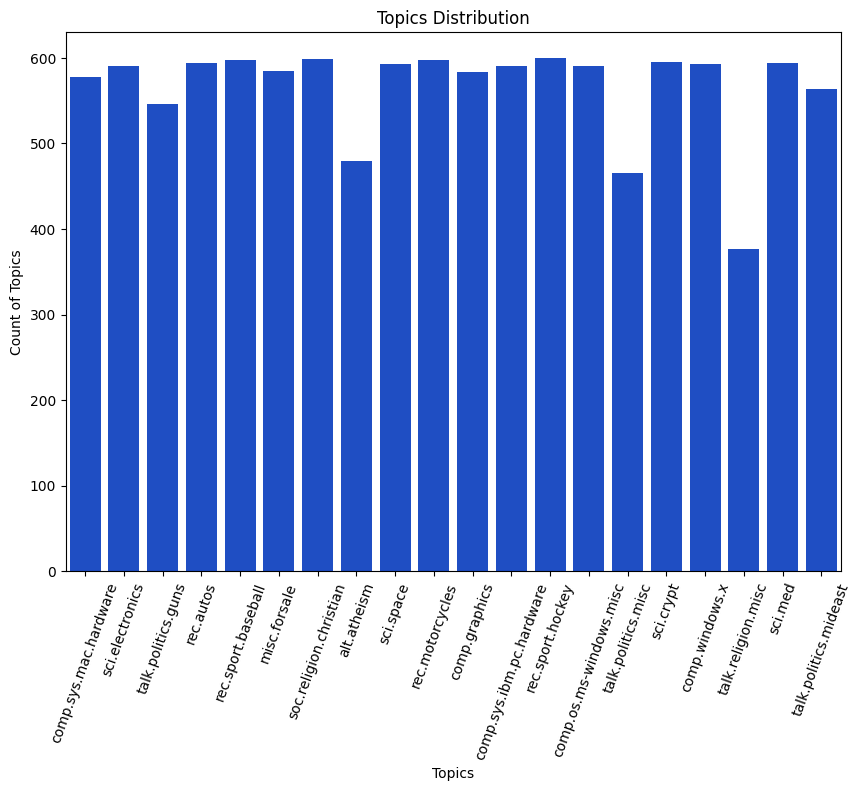

In [ ]:
colors = ['blue', 'purple', 'green']
plt.figure(figsize = [10,7])
ax = sns.countplot(df_data, x = 'Target_name', color = sns.xkcd_rgb[colors[0]])
plt.title('Topics Distribution')
plt.xlabel('Topics')
plt.ylabel('Count of Topics')
plt.xticks(rotation=70)

In [ ]:
# 'windows_blue' color 선택 시 error 발생하여 'blue'로 변경

#       1 colors = ['windows_blue', 'purple', 'green']
#       2 plt.figure(figsize = [10,7])
# ----> 3 ax = sns.countplot(df_data, x = 'Target_name', color = sns.xkcd_rgb[colors[0]])
#       4 plt.title('Topics 분포')
#       5 plt.xlabel('Topics')

# KeyError: 'windows_blue'

In [38]:
for (i, sentence) in enumerate(df_data['News']):
    pattern = re.compile(r'[^a-zA-Z]+')
    sentence = pattern.sub(' ', sentence).strip()

    l_words = word_tokenize(sentence)

    l_stopwords = set(stopwords.words('english'))
    l_words = [word for word in l_words if word not in l_stopwords]

    l_words = [word for word in l_words if len(word) >= 3]

    l_words = [WordNetLemmatizer().lemmatize(word) for word in l_words]
    sentence = " ".join(l_words)


    df_data['News'][i] = sentence


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_data['News'][i] = sentence
<ipython-input-38-30f87126e060>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['News'][i] = sentence
<ipython-input-38-30f87126e060>:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a c

In [39]:
df_data.head()

,News,Target,Target_name
0,The real question opinion Motorola processor r...,4,comp.sys.mac.hardware
1,Please could someone give current street price...,4,comp.sys.mac.hardware
2,Can somebody please help information American ...,12,sci.electronics
3,article rwing UUCP pat rwing UUCP Pat Myrto wr...,16,talk.politics.guns
4,From article news ysu edu yfn ysu edu John Dak...,7,rec.autos


In [40]:
vec = TfidfVectorizer(tokenizer = lambda x: str(x).split())
X = vec.fit_transform(df_data['News'])
print(X.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(11314, 76021)


### LSA (Latent Semantic Analysis)

In [42]:
lsa_model = TruncatedSVD(n_components = 20,
                         algorithm = 'randomized',
                         n_iter = 100,
                         random_state = 12)
lsa_model.fit(X)

TruncatedSVD(n_components=20, n_iter=100, random_state=12)

In [43]:
print(lsa_model.components_.shape)

(20, 76021)


In [44]:
topics = lsa_model.fit_transform(X)
print(topics.shape)

(11314, 20)


In [46]:
terms = vec.get_feature_names_out()
print(len(terms))

76021


In [48]:
comp = lsa_model.components_
word2topic = pd.Series()

for i, comp_i in enumerate(comp):
    term_topic = pd.Series(comp_i, index = terms)
    term_topic.sort_values(ascending = False, inplace = True)
    word2topic['Topic' + str(i+1)] = list(term_topic.iloc[:10].index)

print('Topics  \t\t Words')
for i, comp_i in zip(word2topic.index, word2topic):
    print(i,       '\t', comp_i)

Topics  		 Words
Topic1 	 ['the', 'edu', 'would', 'one', 'writes', 'com', 'people', 'article', 'know', 'like']
Topic2 	 ['god', 'people', 'jesus', 'believe', 'say', 'edu', 'think', 'law', 'bible', 'christian']
Topic3 	 ['god', 'key', 'jesus', 'bible', 'chip', 'faith', 'christian', 'file', 'law', 'encryption']
Topic4 	 ['key', 'chip', 'encryption', 'clipper', 'government', 'escrow', 'phone', 'algorithm', 'security', 'nsa']
Topic5 	 ['drive', 'scsi', 'ide', 'disk', 'controller', 'hard', 'floppy', 'bus', 'car', 'meg']
Topic6 	 ['game', 'team', 'god', 'key', 'player', 'chip', 'hockey', 'play', 'season', 'jesus']
Topic7 	 ['edu', 'writes', 'article', 'key', 'com', 'god', 'file', 'apr', 'game', 'scsi']
Topic8 	 ['file', 'window', 'israel', 'windows', 'drive', 'israeli', 'gun', 'dos', 'the', 'disk']
Topic9 	 ['card', 'driver', 'video', 'monitor', 'color', 'window', 'bus', 'com', 'bit', 'mode']
Topic10 	 ['car', 'window', 'bike', 'com', 'file', 'god', 'problem', 'engine', 'good', 'thing']
Topi

### LDA (Latent Dirichlet Allocation)

In [51]:
lda_model = LatentDirichletAllocation(n_components = 20,
                                      learning_method = 'online',
                                      random_state = 12,
                                      max_iter = 5,
                                      learning_offset = 50)
lda_model.fit(X)

LatentDirichletAllocation(learning_method='online', learning_offset=50,
                          max_iter=5, n_components=20, random_state=12)

In [52]:
print(lda_model.components_.shape)

(20, 76021)


In [53]:
comp_lda = lda_model.components_
word2topic_lda = pd.Series()

for i, comp_i in enumerate(comp_lda):
    term_topic = pd.Series(comp_i, index = terms)
    term_topic.sort_values(ascending = False, inplace = True)
    word2topic_lda['Topic' + str(i+1)] = list(term_topic.iloc[:10].index)

print('Topics  \t\t Words')
for i, comp_i in zip(word2topic_lda.index, word2topic_lda):
    print(i,       '\t', comp_i)

Topics  		 Words
Topic1 	 ['iig', 'drexel', 'rpc', 'cbis', 'burzynski', 'knbr', 'wetstein', 'hlvs', 'hillel', 'jpw']
Topic2 	 ['chz', 'pyeatt', 'soooooooooooooooorry', 'scx', 'glxmdraw', 'texaco', 'rlk', 'pkk', 'glxwinset', 'glxunlink']
Topic3 	 ['rle', 'vgalogo', 'tudelft', 'lgo', 'transcendental', 'qjqed', 'paintshop', 'grafics', 'rzmain', 'cnf']
Topic4 	 ['xga', 'pagemaker', 'bootable', 'dpy', 'mirsky', 'faceplate', 'bauer', 'atmanager', 'switchover', 'pads']
Topic5 	 ['harkey', 'rolex', 'niet', 'bilinsky', 'wetteland', 'vmsb', 'csupomona', 'oscs', 'een', 'meer']
Topic6 	 ['emotions', 'parametrically', 'definied', 'marse', 'seirio', 'kristin', 'lonoak', 'tres', 'vanecek', 'lina']
Topic7 	 ['waldbronn', 'xtdm', 'ffritze', 'fritze', 'fromut', 'hpwbe', 'militzok', 'deuelpm', 'laymans', 'befuddlement']
Topic8 	 ['karicha', 'inconsistences', 'uncertainly', 'weeeeelllllll', 'crosscheck', 'shaz', 'narration', 'fudged', 'recreating', 'coprocessor']
Topic9 	 ['edu', 'the', 'would', 'one', 'w

In [54]:
n = 5
for i, topic in enumerate(comp_lda):
    print('Topic', str(i+1), ':', [(terms[j], topic[j].round(2)) for j in topic.argsort()[:-n-1:-1]])

Topic 1 : [('iig', 1.94), ('drexel', 1.79), ('rpc', 1.53), ('cbis', 1.53), ('burzynski', 1.38)]
Topic 2 : [('chz', 1.35), ('pyeatt', 1.26), ('soooooooooooooooorry', 1.05), ('scx', 0.95), ('glxmdraw', 0.93)]
Topic 3 : [('rle', 3.51), ('vgalogo', 1.74), ('tudelft', 0.76), ('lgo', 0.63), ('transcendental', 0.57)]
Topic 4 : [('xga', 2.03), ('pagemaker', 1.68), ('bootable', 1.55), ('dpy', 1.52), ('mirsky', 1.37)]
Topic 5 : [('harkey', 2.19), ('rolex', 1.44), ('niet', 1.41), ('bilinsky', 1.36), ('wetteland', 1.32)]
Topic 6 : [('emotions', 0.56), ('parametrically', 0.49), ('definied', 0.49), ('marse', 0.38), ('seirio', 0.38)]
Topic 7 : [('waldbronn', 0.53), ('xtdm', 0.37), ('ffritze', 0.29), ('fritze', 0.29), ('fromut', 0.29)]
Topic 8 : [('karicha', 0.28), ('inconsistences', 0.14), ('uncertainly', 0.09), ('weeeeelllllll', 0.09), ('crosscheck', 0.09)]
Topic 9 : [('edu', 259.07), ('the', 237.58), ('would', 209.08), ('one', 197.03), ('writes', 194.3)]
Topic 10 : [('lewb', 0.8), ('rawley', 0.63),

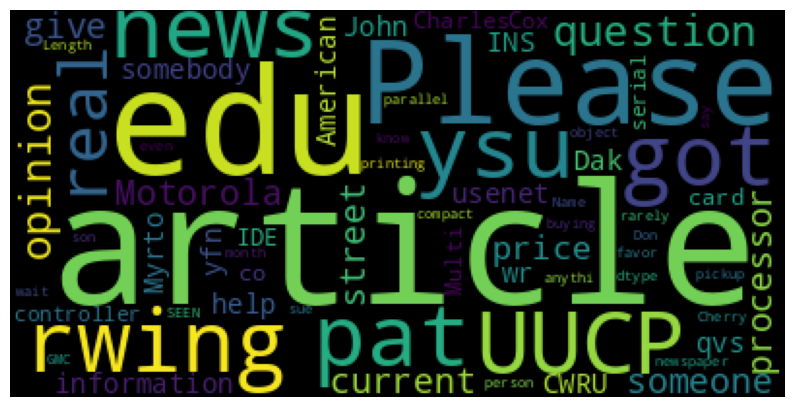

In [56]:
wordcloud = WordCloud(background_color = 'black',
                      max_words = 200).generate(str(df_data['News']))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()